# 영화리뷰 이진분류 예제
사용데이터 : IMDB 데이터셋
samples은 Train : 25000개, Test : 25000개로 나뉘어져있고, 각각 리뷰는 긍정(1) or 부정(0)으로 구성되어 있음

In [155]:
from tensorflow.keras.datasets import imdb
# 리뷰데이터에서 가장 많이 나오는 단어를 10000개 사용
(train,train_t),(test,test_t)=imdb.load_data(num_words=10000)

In [156]:
# 리뷰데이터 단어의 인덱스
print(train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [157]:
# 0이면 부정 1이면 긍정
print(train_t)

[1 0 0 ... 0 1 0]


## 리뷰데이터 샘플 하나를 단어로 복원

In [158]:
word_idx=imdb.get_word_index()

In [159]:
# 각각의 key:단어 value:단어의 인덱스
word_idx

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [160]:
# 인덱스와 단어를 매핑하기 위해 키와 값을 뒤집음
word_dict=dict([(value,key) for (key,value) in word_idx.items()])

In [161]:
review=' '.join([word_dict.get(i-3,'') for i in train[0]])

In [162]:
review

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

### 리뷰 예시 5개  출력

In [163]:
for i in train[:5]:
    print(' '.join([word_dict.get(j-3,'') for j in i]))
    print('\n')

 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

## 데이터 준비
숫자리스트로 이루어진 데이터셋은 모두 길이가 달라 신경망에 적용할 수 없으므로 길이를 가장 긴 리스트에 맞춰서 변환해야함

- 리스트를 텐서로 바꾸는 방법
1. 같은 길이가 되도록 리스트에 **패딩을 추가**해 (sample,max_length)의 텐서로 변환(Embedding층)

2. 리스트를 **멀티핫 인코딩**으로 0과 1의 벡터로 변환해 10000개의 고유의 값을 가지는 벡터로 변환

(예제에서 두번째 방법을 이용함)

### 임베딩 층으로 진행할 경우 텐서의 길이(예시)

In [164]:
length=[len(i) for i in train]

In [165]:
# 최대 길이의 리뷰는 2494이므로 모든 리뷰는 2494에 맞춰서 인코딩 되어야함
max(length)

2494

train.shape => (25000,2494)

### 인코딩 방식으로 진행할 경우 텐서의 길이
10000개의 단어인덱스가 고유값(0,1로 이루어진 값)을 가져야하므로

train.shape => (25000,10000)

<hr>

## 신경망 모델 구현

### 입력데이터셋 전처리

In [166]:
import numpy as np

In [167]:
def encoding(dataset,ndim=10000):
    multi_encode=np.zeros(shape=(len(dataset),ndim))
    for i,k in enumerate(dataset):
        for j in k:
            multi_encode[i,j]=1.
    return multi_encode

In [168]:
x_train=encoding(train)

In [169]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [170]:
y_train=np.asarray(train_t).astype('float32')
y_test=np.asarray(test_t).astype('float32')

### 모델 층 생성

In [171]:
from tensorflow import keras
from tensorflow.keras import layers

In [172]:
model=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

### 모델 컴파일

In [173]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### validation 데이터 생성

In [174]:
val_x=x_train[:10000]
x_tr=x_train[10000:]
val_y=y_train[:10000]
y_tr=y_train[10000:]

### 모델 학습

In [175]:
history=model.fit(x_tr,y_tr,epochs=20,batch_size=512,validation_data=(val_x,val_y))

Epoch 1/20
30/30 [==============================] - 4s 63ms/step - loss: 0.5200 - accuracy: 0.7692 - val_loss: 0.3932 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3082 - accuracy: 0.8995 - val_loss: 0.3191 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2219 - accuracy: 0.9272 - val_loss: 0.2799 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1720 - accuracy: 0.9454 - val_loss: 0.2761 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1423 - accuracy: 0.9531 - val_loss: 0.2845 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.2957 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0951 - accuracy: 0.9729 - val_loss: 0.3846 - val_accuracy: 0.8650
Epoch 8/20
30

## 결과 값

In [176]:
result=history.history

In [177]:
import pandas as pd

In [178]:
res=pd.DataFrame(result)

In [179]:
res

,loss,accuracy,val_loss,val_accuracy
0,0.519991,0.769200,0.393161,0.8687
1,0.308191,0.899533,0.319091,0.8782
2,0.221882,0.927200,0.279906,0.8897
3,0.171954,0.945400,0.276136,0.8884
4,0.142268,0.953133,0.284536,0.8867
5,0.113012,0.966333,0.295741,0.8862
6,0.095068,0.972867,0.384579,0.8650
7,0.074742,0.980400,0.335832,0.8818
8,0.061169,0.984400,0.404527,0.8645
9,0.051351,0.986800,0.383099,0.8785


#### 에포크에 따른 훈련손실

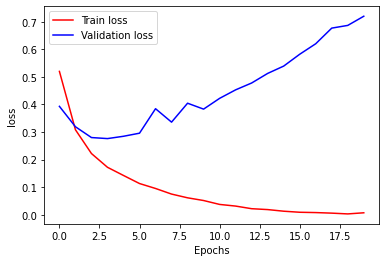

In [180]:
import matplotlib.pyplot as plt
plt.plot(res.index,res.loss,'r',label='Train loss')
plt.plot(res.index,res.val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

#### 에포크에 따른 훈련 정확도

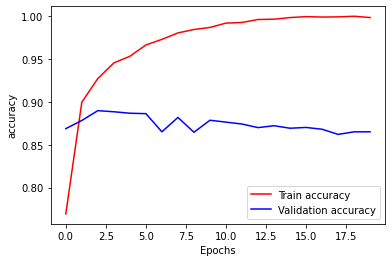

In [181]:
plt.plot(res.index,res.accuracy,'r',label='Train accuracy')
plt.plot(res.index,res.val_accuracy,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

Train과 valid 데이터 사이에 차이가 큰 것으로 보아 **과대적합** 되었음.<br>
네번째 epochs부터 손실그래프와 정확도 그래프가 반전되므로 4번째 에포크까지만 재학습

In [182]:
model=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [183]:
x_test=encoding(test)

In [184]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history2=model.fit(x_tr,y_tr,epochs=4,batch_size=512)
res2=model.evaluate(x_test,y_test)

Epoch 1/4
30/30 [==============================] - 2s 18ms/step - loss: 0.4969 - accuracy: 0.7899
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.2867 - accuracy: 0.9042
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2087 - accuracy: 0.9318
Epoch 4/4
782/782 [==============================] - 9s 4ms/step - loss: 0.3070 - accuracy: 0.8771


In [188]:
res_tr=pd.DataFrame(history2.history)

In [189]:
res_tr

,loss,accuracy
0,0.496939,0.789867
1,0.286712,0.904200
2,0.208700,0.931800
3,0.161360,0.947600


### Test데이터 손실 및 정확도 비교
Train => loss 0.16, accuracy 0.95<br>
Test => loss 0.3 accuracy 0.87

In [190]:
# 에포크 4번째까지 학습한 Train 결과
res_tr[-1:]

,loss,accuracy
3,0.16136,0.9476


In [187]:
# 에포크 4번째까지 학습한 Test 결과
res2

[0.30697154998779297, 0.8770800232887268]

#### 긍정/부정일 확률 예측
pred의 값이 0.5보다 크면 긍정 아니면 부정

In [130]:
pred=model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


In [226]:
pred

array([[0.20371833],
       [0.9999931 ],
       [0.9985046 ],
       ...,
       [0.10831764],
       [0.12629563],
       [0.9032548 ]], dtype=float32)

### Test 리뷰데이터 맨 앞의 10개 출력(target)

In [214]:
for i in test[:10]:
    print(' '.join([word_dict.get(j-3,'') for j in i]))
    print('\n')

 please give this one a miss br br   and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite  so all you madison fans give this a miss


 this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances  the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere  with sexual tension and psychological  it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfec